# Entorno de trabajo: Crear un dataset de noticias de prensa a partir del motor de búsqueda Sophia

Este notebook muestra una manera de extraer noticias desde el motor de búsqueda de _Sophia_, a partir de una **palabra clave**, un **país** y un **periodo de tiempo**.


_Sophia_ es un proyecto I+i+D desarrollado en la Universidad Austral de Chile desde 2019. El motor de búsqueda se encuentra en fase de mejoramiento continuo. Por cualquier pregunta o problema técnica con este notebook, no dudar en contactarme por Discord (@MatthieuVernier) o por correo mvernier@inf.uach.cl.

## 0. Librerías útiles

- Elasticsearch es el motor de búsqueda utilizado por Sophia
- Requiere la instalación del paquete elasticsearch

In [2]:
!python -V

Python 3.9.7


In [3]:
!pip install elasticsearch==7.16.3

In [4]:
import elasticsearch
from datetime import datetime

In [5]:
elasticsearch.__version__

(7, 16, 3)

## 1. Parámetros de la búsqueda

In [6]:
country="chile"
from_="2021-12-20"
to_="2021-12-26"
media_outlets=["elllanquihue","elaustral","laestrelladechiloe","elheraldoaustral","radiosago",
               "elrepuertero","elvacanudo","elhuemul","seminariolocal","elquellonino","elinsular",
               "radiopudeto","radioacogida","elcalbucano","segundos33",
               "prensadelestuario","fresiaahora","soychiloe"]

keyword=""
simple_keyword=False

Características del motor de búsqueda:  
- El formato de las fechas es: YYYY-MM-DD
- El motor de búsqueda incluye noticias por distintos paises, pero se recomienda utilizar "chile" por el momento.
- El motor de búsqueda incluye datos entre el año 2000 y el año 2021.

## 2. Parámetros de conexión al motor de búsqueda de Sophia

In [7]:
IP = "search.sophia2.org"
PORT = 9200
USER= "elastic"
PASS= "dummy_elastic"

In [8]:
#NO MODIFICAR

es = elasticsearch.Elasticsearch(
    IP,
    #port=PORT,
    http_auth=(USER, PASS)
)

## 3. Búsqueda de noticias de prensa

- Preparación de la consulta en el formato solicitado por Elasticsearch

In [9]:
#NO MODIFICAR
match=""
if (simple_keyword):
    match="match"
else:
    match="match_phrase"

#se comenta para que pueda hacer la búsqueda sin la palabra filtrada
query = { 
    "bool": { 
      #"must": [
       # {match: { "text":keyword}}

      #],
    "filter": [
        {"range": {
      "date": {
        "gte": from_,
        "lt": to_
      }}},
        { "term":  { "country": country }},
        { "terms":  { "media_outlet": media_outlets }} 
    ]
    }  
}

- Envio de la consulta
- No se puede devolver más de 10.000 noticias. En caso de obtener 10.000 respuestas, se recomienda buscar en un periodo de tiempo más corto o modificar la consulta.

In [10]:
res = es.search(index="news", query=query, size=10000)
print("Son %d noticias encontradas..." % res['hits']['total']['value'])

Son 1496 noticias encontradas...


## 4. Guardar los datos en un dataframe Pandas y en un archivo CSV

In [11]:
import pandas as pd

data = {'id_news':[],'country':[],'media_outlet':[],'url':[],'title':[],'text':[],'date':[],'search':[]}

df = pd.DataFrame(data)  
  
for hit in res['hits']['hits']:
    id_news = hit['_source']['id_news']
    country = hit['_source']['country']
    media_outlet = hit['_source']['media_outlet']
    url = hit['_source']['url']
    title = hit['_source']['title']
    text = hit['_source']['text']
    date = hit['_source']['date']
    search = keyword
    
    new_row = {'id_news':id_news, 'country':country, 'media_outlet':media_outlet, 'url':url, 'title':title, 'text':text, 'date':date, 'search':search}
    
    df = df.append(new_row, ignore_index=True)

df

C:\Users\floje\AppData\Local\Temp\ipykernel_15260\2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\floje\AppData\Local\Temp\ipykernel_15260\2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\floje\AppData\Local\Temp\ipykernel_15260\2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\floje\AppData\Local\Temp\ipykernel_15260\2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\floje\A

,id_news,country,media_outlet,url,title,text,date,search
0,21887359.0,chile,radiosago,https://www.radiosago.cl/camara-de-comercio-pu...,Cámara de Comercio Puerto Montt responde a alc...,Cabe recordar que luego que el gremio presenta...,2021-12-24,
1,21909781.0,chile,radiosago,https://www.radiosago.cl/defienden-decision-de...,Defienden decisión de no otorgar terrenos de e...,Luego que el Senador Rabindranath Quinteros em...,2021-12-24,
2,21909810.0,chile,radiosago,https://www.radiosago.cl/senador-quinteros-def...,Senador Quinteros defiende construcción de cen...,En su calidad de presidente de la comisión de ...,2021-12-24,
3,21909823.0,chile,radiosago,https://www.radiosago.cl/146-contagios-de-covi...,146 contagios de covid-19 se reportaron este s...,"Así lo informó la Seremi de Salud Los Lagos, d...",2021-12-25,
4,21909824.0,chile,radiosago,https://www.radiosago.cl/134-contagios-y-1-fal...,134 contagios y 1 fallecido dejó el covid-19 e...,"Así lo confirmó la autoridad sanitaria, detall...",2021-12-24,
...,...,...,...,...,...,...,...,...
1491,47535132.0,chile,laestrelladechiloe,https://www.laestrellachiloe.cl/impresa/2021/1...,Poesía después del incendio en la Isla,1¿Cómo están las cosas tras el incendio en Cas...,2021-12-23,
1492,47535133.0,chile,laestrelladechiloe,https://www.laestrellachiloe.cl/impresa/2021/1...,"""El discípulo del chef"" sumará cinco nuevos pa...",En enero próximo cinco nuevos famosos llegarán...,2021-12-23,
1493,47535134.0,chile,laestrelladechiloe,https://www.laestrellachiloe.cl/impresa/2021/1...,"""Matrix"" estrena su cuarta entrega a 22 años d...","Corría 1999, cuando una película, ""Matrix"" lle...",2021-12-23,
1494,47535137.0,chile,laestrelladechiloe,https://www.laestrellachiloe.cl/impresa/2021/1...,Un ejercicio nostálgico de Steven Spielberg,¿Por qué Steven Spielberg decidió hacer un rem...,2021-12-23,


In [12]:
#!pip install pandas

- Verifiquemos si existen noticias con la misma URL

In [13]:
df['url'].duplicated().any()

True

- Eliminar las noticias duplicadas

In [14]:
df = df.drop_duplicates(subset='url', keep='first')

In [15]:
df

,id_news,country,media_outlet,url,title,text,date,search
0,21887359.0,chile,radiosago,https://www.radiosago.cl/camara-de-comercio-pu...,Cámara de Comercio Puerto Montt responde a alc...,Cabe recordar que luego que el gremio presenta...,2021-12-24,
1,21909781.0,chile,radiosago,https://www.radiosago.cl/defienden-decision-de...,Defienden decisión de no otorgar terrenos de e...,Luego que el Senador Rabindranath Quinteros em...,2021-12-24,
2,21909810.0,chile,radiosago,https://www.radiosago.cl/senador-quinteros-def...,Senador Quinteros defiende construcción de cen...,En su calidad de presidente de la comisión de ...,2021-12-24,
3,21909823.0,chile,radiosago,https://www.radiosago.cl/146-contagios-de-covi...,146 contagios de covid-19 se reportaron este s...,"Así lo informó la Seremi de Salud Los Lagos, d...",2021-12-25,
4,21909824.0,chile,radiosago,https://www.radiosago.cl/134-contagios-y-1-fal...,134 contagios y 1 fallecido dejó el covid-19 e...,"Así lo confirmó la autoridad sanitaria, detall...",2021-12-24,
...,...,...,...,...,...,...,...,...
897,22597560.0,chile,elaustral,https://www.australosorno.cl/impresa/2021/12/2...,"Francisca Valenzuela publica ""Salú"", el último...","En el primer semestre de 2022, Francisca Valen...",2021-12-20,
930,47532675.0,chile,elaustral,https://www.australosorno.cl/impresa/2021/12/2...,"Brereton: ""Ir a la Roja me hizo madurar como p...",Como una de las estrellas de la Championship d...,2021-12-23,
995,47533038.0,chile,elaustral,https://www.australosorno.cl/impresa/2021/12/2...,"Con el viejo truco de achicar el envase, Japón...",Hacer envases más pequeños mientras se siguen ...,2021-12-25,
1165,47375525.0,chile,elheraldoaustral,https://www.eha.cl/noticia/local/exposicion-na...,Exposición Nativo Arte & Oficio en Biblioteca ...,La Exposición NATIVO arte & oficio reúne a dos...,2021-12-21,


- Guardar los archivos en un CSV

In [16]:
nombre_archivo=keyword.replace(' ', '')+"_"+country+"_"+from_+"_"+to_+".csv"
print("El archivo se llama:")
print(nombre_archivo)
df.to_csv("./"+nombre_archivo)

El archivo se llama:
_chile_2021-12-20_2021-12-26.csv


- Realizar algunas consultas SQL sobre el dataset

In [17]:
from pandasql import sqldf 

In [18]:
#!pip install pandasql

In [19]:
result = sqldf("SELECT media_outlet,count(*) FROM df GROUP BY media_outlet ORDER BY count(*) DESC")
result

,media_outlet,count(*)
0,laestrelladechiloe,86
1,elllanquihue,76
2,elaustral,75
3,radiosago,67
4,elrepuertero,54
5,elvacanudo,52
6,elheraldoaustral,44
7,elinsular,32
8,seminariolocal,14
9,radiopudeto,12


In [20]:
#!pip install pandas

In [21]:
import pandas

archivo = "_chile_2021-12-20_2021-12-26.csv"
corpus = pandas.read_csv(archivo)

In [22]:
corpus.head(5)

,Unnamed: 0,id_news,country,media_outlet,url,title,text,date,search
0,0,21887359.0,chile,radiosago,https://www.radiosago.cl/camara-de-comercio-pu...,Cámara de Comercio Puerto Montt responde a alc...,Cabe recordar que luego que el gremio presenta...,2021-12-24,NaN
1,1,21909781.0,chile,radiosago,https://www.radiosago.cl/defienden-decision-de...,Defienden decisión de no otorgar terrenos de e...,Luego que el Senador Rabindranath Quinteros em...,2021-12-24,NaN
2,2,21909810.0,chile,radiosago,https://www.radiosago.cl/senador-quinteros-def...,Senador Quinteros defiende construcción de cen...,En su calidad de presidente de la comisión de ...,2021-12-24,NaN
3,3,21909823.0,chile,radiosago,https://www.radiosago.cl/146-contagios-de-covi...,146 contagios de covid-19 se reportaron este s...,"Así lo informó la Seremi de Salud Los Lagos, d...",2021-12-25,NaN
4,4,21909824.0,chile,radiosago,https://www.radiosago.cl/134-contagios-y-1-fal...,134 contagios y 1 fallecido dejó el covid-19 e...,"Así lo confirmó la autoridad sanitaria, detall...",2021-12-24,NaN


In [23]:
print("El total de noticias es: ",len(corpus))

El total de noticias es:  557


In [24]:
#Lista de noticias segun el corpus

lista_noticias = corpus.text.values.tolist()

In [25]:
#lista_noticias[100]

In [26]:
#!python -m spacy download es_core_news_sm

In [27]:
#!pip install pyLDAvis
#!pip install spacy
#!pip install numpy

In [28]:
import spacy
from spacy.matcher import Matcher
nlp = spacy.load("es_core_news_sm")
matcher = Matcher(nlp.vocab)

In [29]:
import numpy as np
import pandas as pd

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

c:\Users\floje\miniconda3\envs\myenv\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [30]:
#!pip install matplotlib
#!pip install gensim

In [31]:
#!python -m spacy download es_core_news_sm

In [32]:
pattern_1 = [{"POS": "NOUN"},{"LOWER": "de"}, {"POS": "NOUN"}]
matcher.add("NOUN-de-NOUN", [pattern_1])

pattern_2 = [{"POS": "NOUN"}, {"POS": "ADJ"}]
matcher.add("NOUN-ADJ", [pattern_2])

In [33]:
def text_to_list(noticia):
    list_of_words = []
    
    try:
        doc = nlp(noticia)

        for token in doc:
            if (token.pos_=="NOUN"):
                list_of_words.append(token.text)

        for ent in doc.ents:
            if (ent.label_ == "PER" and " " in ent.text):
                list_of_words.append(ent.text)

        matches = matcher(doc)

        for match_id, start, end in matches:
            span = doc[start:end]  # The matched span
            list_of_words.append(span.text)
    
    except Exception as e: 
        print(noticia)
        print(e)
    
    return list_of_words

In [34]:
#lista_noticias[0]

In [35]:
#text_to_list(lista_noticias[0])

In [36]:
noticias_procesadas = []

for index, noticia in enumerate(lista_noticias):
    #print(index)
    noticia_procesada = text_to_list(noticia)
    noticias_procesadas.append(noticia_procesada)

nan
[E1041] Expected a string, Doc, or bytes as input, but got: <class 'float'>
nan
[E1041] Expected a string, Doc, or bytes as input, but got: <class 'float'>
nan
[E1041] Expected a string, Doc, or bytes as input, but got: <class 'float'>
nan
[E1041] Expected a string, Doc, or bytes as input, but got: <class 'float'>
nan
[E1041] Expected a string, Doc, or bytes as input, but got: <class 'float'>
nan
[E1041] Expected a string, Doc, or bytes as input, but got: <class 'float'>
nan
[E1041] Expected a string, Doc, or bytes as input, but got: <class 'float'>


In [37]:
#N = 5
#print(lista_noticias[N],"\n")
#print(noticias_procesadas[N])

In [38]:
id2word = corpora.Dictionary(noticias_procesadas)
id2word

In [39]:
#id2word[180]

In [40]:
texts = noticias_procesadas

In [41]:
dataset = [id2word.doc2bow(noticia_procesada) for noticia_procesada in noticias_procesadas] 

In [42]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=dataset,
                                           id2word=id2word,
                                           num_topics=10, #modificar a más de 5 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [43]:
lda_model.save('./data/lda_model_textos')

In [44]:
#!pip install pprint

In [45]:
from pprint import pprint

pprint(lda_model.print_topics(num_words=100))

[(0,
  '0.015*"disposición" + 0.015*"equipos" + 0.014*"película" + 0.008*"personal" '
  '+ 0.006*"bomberos" + 0.006*"escuela" + 0.006*"historia" + 0.006*"pareja" + '
  '0.006*"temática" + 0.005*"régimen" + 0.005*"temperatura" + 0.004*"actriz" + '
  '0.004*"padre" + 0.004*"películas" + 0.004*"planes" + 0.004*"megaincendio" + '
  '0.003*"revista" + 0.003*"audiencia" + 0.003*"causas" + 0.003*"vuelos" + '
  '0.003*"comedia" + 0.003*"viento" + 0.003*"matorrales" + 0.003*"vida" + '
  '0.003*"familia" + 0.003*"disparos" + 0.003*"cinta" + 0.003*"estreno" + '
  '0.003*"personaje" + 0.003*"lechugas" + 0.003*"aceite de oliva" + '
  '0.003*"oliva" + 0.003*"empresario" + 0.003*"película navideña" + '
  '0.002*"secuela" + 0.002*"bombero" + 0.002*"saga" + 0.002*"playa" + '
  '0.002*"fecha" + 0.002*"aceite" + 0.002*"años" + 0.002*"streaming" + '
  '0.002*"inicios" + 0.002*"opción" + 0.002*"chilenos" + 0.002*"hija" + '
  '0.002*"padres" + 0.002*"angelito" + 0.002*"doctor" + 0.002*"exoplaneta" + '
  '0.

In [46]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, dataset, id2word)
vis

c:\Users\floje\miniconda3\envs\myenv\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.279622 -0.094071       1        1  38.861423
8     -0.233259  0.204793       2        1  22.227354
7     -0.004476 -0.250472       3        1  11.478237
2     -0.052046 -0.047472       4        1  10.538767
4      0.074524  0.038875       5        1   4.179808
9      0.046370  0.027802       6        1   4.172549
0      0.119324  0.037121       7        1   3.799760
6      0.123951  0.031980       8        1   3.377361
5      0.097354  0.024309       9        1   0.736705
1      0.107879  0.027136      10        1   0.628036, topic_info=                       Term        Freq       Total Category  logprob  loglift
316                   niños  125.000000  125.000000  Default  30.0000  30.0000
14                 comercio   88.000000   88.000000  Default  29.0000  29.0000
283                    país  302.000000  302.000000  Default  28.0000  28.0000
182                personas  428.000000  428.000000  Default  27.0000  27.0000
299                   dosis  141.000000  141.000000  Default  26.0000  26.0000
...                     ...         ...         ...      ...      ...      ...
11958          etapa partir    0.290722    0.912492  Topic10  -7.2308   3.9265
11959  familias vulnerables    0.290722    0.912492  Topic10  -7.2308   3.9265
1674                déficit    0.568693   20.739216  Topic10  -6.5599   1.4739
1175               vivienda    0.504073   21.071670  Topic10  -6.6805   1.3374
1166                peligro    0.308376    4.744296  Topic10  -7.1719   2.3369

[496 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
8007      6  0.977325          2014
369       1  0.259104          2020
369       2  0.086368          2020
369       6  0.518208          2020
369       7  0.086368          2020
...     ...       ...           ...
2631      9  0.307392         árbol
1225      5  0.877296       árboles
1757      3  0.652423         áreas
1757      4  0.339260         áreas
5823      8  0.906784  áreas verdes

[698 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 9, 8, 3, 5, 10, 1, 7, 6, 2])

In [47]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(dataset))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=noticias_procesadas, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.396430237539883

Coherence Score:  0.41539046611415387


In [48]:
### NO CAMBIAR ESTA CELDA###

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print(num_topics)
        
        model = gensim.models.ldamodel.LdaModel(corpus=dataset,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [49]:
start=2
limit=15
step=2

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=dataset, texts=noticias_procesadas, start=start, limit=limit, step=step)

2
4
6
8


c:\Users\floje\miniconda3\envs\myenv\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
c:\Users\floje\miniconda3\envs\myenv\lib\site-packages\gensim\topic_coherence\indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


10
12
14


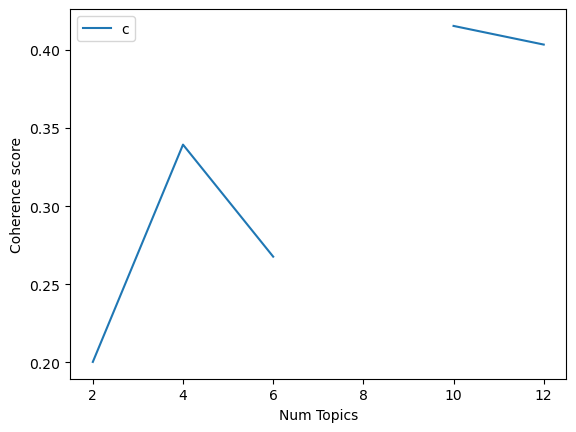

In [50]:
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

Según el gráfico, propondría que a los 10 tópicos hay mejor coherencia

In [51]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2003
Num Topics = 4  has Coherence Value of 0.3394
Num Topics = 6  has Coherence Value of 0.2677
Num Topics = 8  has Coherence Value of nan
Num Topics = 10  has Coherence Value of 0.4154
Num Topics = 12  has Coherence Value of 0.4035
Num Topics = 14  has Coherence Value of nan


In [52]:
#Tópico más óptimo, osea donde la coherencia es mayor, en este caso en 10
optimal_model = model_list[4]

In [53]:
archivo='optimal_model_tarea'

In [54]:
optimal_model.save(archivo)

In [55]:
from gensim.models import LdaModel

optimal_model = LdaModel.load(archivo, mmap='r')

In [56]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, dataset, id2word)
vis

c:\Users\floje\miniconda3\envs\myenv\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.279622 -0.094071       1        1  38.861423
8     -0.233259  0.204793       2        1  22.227354
7     -0.004476 -0.250472       3        1  11.478237
2     -0.052046 -0.047472       4        1  10.538767
4      0.074524  0.038875       5        1   4.179808
9      0.046370  0.027802       6        1   4.172549
0      0.119324  0.037121       7        1   3.799760
6      0.123951  0.031980       8        1   3.377361
5      0.097354  0.024309       9        1   0.736705
1      0.107879  0.027136      10        1   0.628036, topic_info=                       Term        Freq       Total Category  logprob  loglift
316                   niños  125.000000  125.000000  Default  30.0000  30.0000
14                 comercio   88.000000   88.000000  Default  29.0000  29.0000
283                    país  302.000000  302.000000  Default  28.0000  28.0000
182                personas  428.000000  428.000000  Default  27.0000  27.0000
299                   dosis  141.000000  141.000000  Default  26.0000  26.0000
...                     ...         ...         ...      ...      ...      ...
11958          etapa partir    0.290722    0.912492  Topic10  -7.2308   3.9265
11959  familias vulnerables    0.290722    0.912492  Topic10  -7.2308   3.9265
1674                déficit    0.568693   20.739216  Topic10  -6.5599   1.4739
1175               vivienda    0.504073   21.071670  Topic10  -6.6805   1.3374
1166                peligro    0.308376    4.744296  Topic10  -7.1719   2.3369

[496 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
8007      6  0.977325          2014
369       1  0.259104          2020
369       2  0.086368          2020
369       6  0.518208          2020
369       7  0.086368          2020
...     ...       ...           ...
2631      9  0.307392         árbol
1225      5  0.877296       árboles
1757      3  0.652423         áreas
1757      4  0.339260         áreas
5823      8  0.906784  áreas verdes

[698 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 9, 8, 3, 5, 10, 1, 7, 6, 2])

In [58]:
def format_topics_documents(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_documents(ldamodel=optimal_model, corpus=dataset, texts=lista_noticias)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

C:\Users\floje\AppData\Local\Temp\ipykernel_15260\834329666.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\floje\AppData\Local\Temp\ipykernel_15260\834329666.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3,0.7968,"parte, personas, comuna, año, trabajo, años, s...",Cabe recordar que luego que el gremio presenta...
1,1,2,0.4815,"proyectos, provincia, camiones, región, fuego,...",Luego que el Senador Rabindranath Quinteros em...
2,2,3,0.6192,"parte, personas, comuna, año, trabajo, años, s...",En su calidad de presidente de la comisión de ...
3,3,3,0.9552,"parte, personas, comuna, año, trabajo, años, s...","Así lo informó la Seremi de Salud Los Lagos, d..."
4,4,3,0.8235,"parte, personas, comuna, año, trabajo, años, s...","Así lo confirmó la autoridad sanitaria, detall..."
5,5,3,0.3269,"parte, personas, comuna, año, trabajo, años, s...",Ante la tensión de ocupación de las camas crít...
6,6,3,0.4271,"parte, personas, comuna, año, trabajo, años, s...",La información del hallazgo fue confirmada por...
7,7,3,0.9369,"parte, personas, comuna, año, trabajo, años, s...","Así lo informó la Seremi de Salud Los Lagos, d..."
8,8,7,0.4684,"proyecto, marzo, estudiantes, experiencia, des...",Tras complicaciones en su estado de salud que ...
9,9,8,0.9582,"país, dosis, presidente, gobierno, Gabriel Bor...","El Delegado Presidencial Regional, Carlos Geis..."


In [59]:
media_outlet = corpus.filter(['media_outlet'], axis=1)
df_dominant_topic=df_dominant_topic.join(media_outlet)
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,media_outlet
0,0,3,0.7968,"parte, personas, comuna, año, trabajo, años, s...",Cabe recordar que luego que el gremio presenta...,radiosago
1,1,2,0.4815,"proyectos, provincia, camiones, región, fuego,...",Luego que el Senador Rabindranath Quinteros em...,radiosago
2,2,3,0.6192,"parte, personas, comuna, año, trabajo, años, s...",En su calidad de presidente de la comisión de ...,radiosago
3,3,3,0.9552,"parte, personas, comuna, año, trabajo, años, s...","Así lo informó la Seremi de Salud Los Lagos, d...",radiosago
4,4,3,0.8235,"parte, personas, comuna, año, trabajo, años, s...","Así lo confirmó la autoridad sanitaria, detall...",radiosago
...,...,...,...,...,...,...
552,552,3,0.6923,"parte, personas, comuna, año, trabajo, años, s...","En el primer semestre de 2022, Francisca Valen...",elaustral
553,553,7,0.5408,"proyecto, marzo, estudiantes, experiencia, des...",Como una de las estrellas de la Championship d...,elaustral
554,554,2,0.4897,"proyectos, provincia, camiones, región, fuego,...",Hacer envases más pequeños mientras se siguen ...,elaustral
555,555,2,0.7835,"proyectos, provincia, camiones, región, fuego,...",La Exposición NATIVO arte & oficio reúne a dos...,elheraldoaustral


In [60]:
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,media_outlet
0,0,3,0.7968,"parte, personas, comuna, año, trabajo, años, s...",Cabe recordar que luego que el gremio presenta...,radiosago
1,1,2,0.4815,"proyectos, provincia, camiones, región, fuego,...",Luego que el Senador Rabindranath Quinteros em...,radiosago
2,2,3,0.6192,"parte, personas, comuna, año, trabajo, años, s...",En su calidad de presidente de la comisión de ...,radiosago
3,3,3,0.9552,"parte, personas, comuna, año, trabajo, años, s...","Así lo informó la Seremi de Salud Los Lagos, d...",radiosago
4,4,3,0.8235,"parte, personas, comuna, año, trabajo, años, s...","Así lo confirmó la autoridad sanitaria, detall...",radiosago
...,...,...,...,...,...,...
552,552,3,0.6923,"parte, personas, comuna, año, trabajo, años, s...","En el primer semestre de 2022, Francisca Valen...",elaustral
553,553,7,0.5408,"proyecto, marzo, estudiantes, experiencia, des...",Como una de las estrellas de la Championship d...,elaustral
554,554,2,0.4897,"proyectos, provincia, camiones, región, fuego,...",Hacer envases más pequeños mientras se siguen ...,elaustral
555,555,2,0.7835,"proyectos, provincia, camiones, región, fuego,...",La Exposición NATIVO arte & oficio reúne a dos...,elheraldoaustral


In [61]:
from pandasql import sqldf 
result = sqldf("SELECT Dominant_Topic, count(*) as nb_noticias FROM df_dominant_topic GROUP BY Dominant_Topic ORDER BY count(*) DESC")
result

,Dominant_Topic,nb_noticias
0,3,244
1,8,119
2,7,52
3,2,51
4,0,26
5,9,22
6,6,21
7,4,18
8,5,4
